# Ch 11 The Dynamics of Derivative Prices

In [1]:
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt

## 4 Major Models of SDEs

### 4.1 Linear Constant Coefficient SDEs (p 266)

$$
    dS_t = \mu dt + \sigma dW_t, \qquad t \in [0, \infty)
$$

, i.e. drift and diffusion coefficients are independent of the information received over time until $t$,

A discrete approximation is given:
$$
    S_k = S_{k - 1} + .01(.001) + .03(\Delta W_k), \qquad k = 1, 2, \ldots, 1000.
$$
with the initial point $S_0 = 100$.

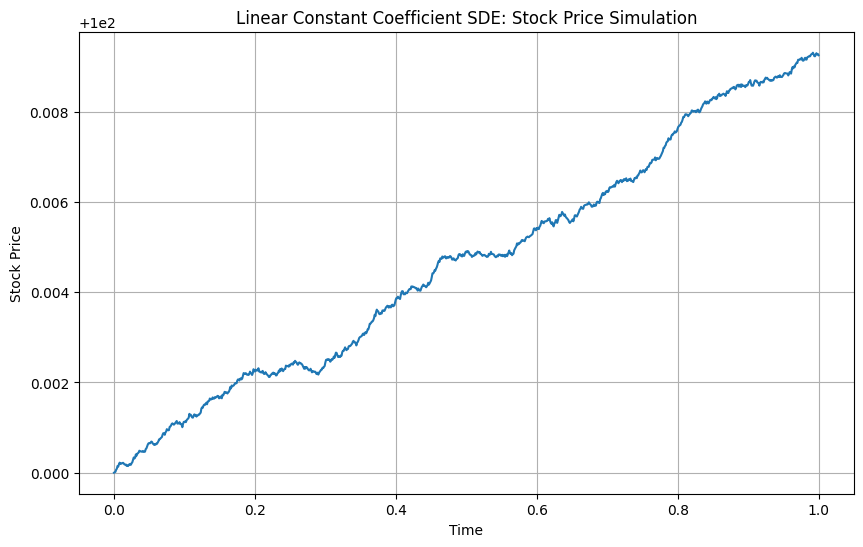

In [58]:
def LCC_SDE(S0, mu, sigma, num_steps):
    dt = 1 / num_steps
    time = np.linspace(0, 1, num_steps+1)
    paths = np.zeros(num_steps+1)
    paths[0] = S0

    for k in range(1, num_steps+1):
        dW = np.random.normal(0, np.sqrt(dt))
        drift = mu * dt
        diffusion = sigma * np.sqrt(dt) * dW
        paths[k] = paths[k-1] + drift + diffusion

    return time, paths

# initial conditions
S0 = 100.0  # initial underlying asset price
mu = 0.01
sigma = 0.03
num_steps = 1000  # number of steps in discrete approximation, which is k in the above expression

# simulation
time, paths = LCC_SDE(S0, mu, sigma, num_steps)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(time, paths)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Linear Constant Coefficient SDE: Stock Price Simulation')
plt.grid(True)
plt.show()

### 4.2 Geometric SDEs

The standard SDE used to model underlying asset prices is not the linear coefficient model, but is the `geometric process`. It is the model exploited by Black and Scholes:

$$
    dS_t = \mu S_t dt + \sigma S_t dW_t, \qquad t \in [0, \infty)
$$

Below we implement the following finite difference approximation:

$$
    dS_t = .15 S_t dt + .30 S_t dW_t
$$
with the initial point $S_0 = 100$.

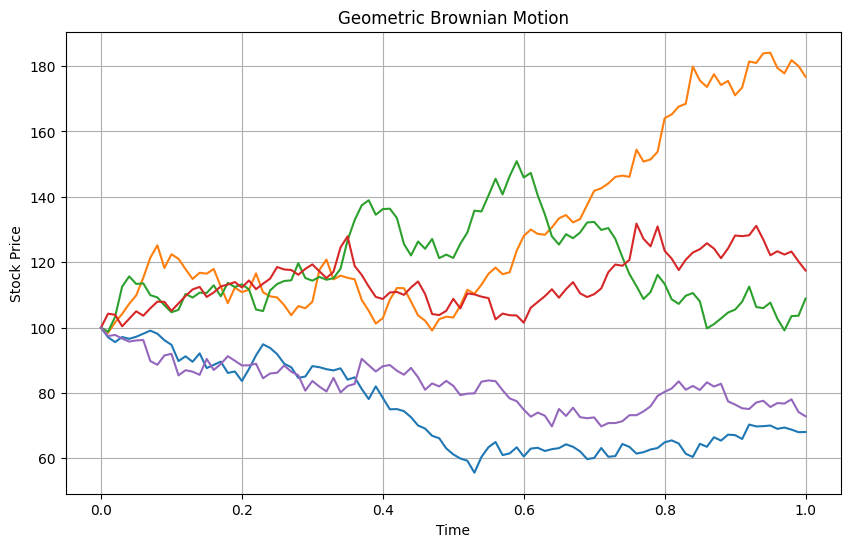

In [47]:
def Geometric_Brownian_Motion(S0, mu, sigma, T, dt, num_paths):
    num_steps = int(T / dt)
    time = np.linspace(0, T, num_steps+1)
    paths = np.zeros((num_paths, num_steps+1 ))  # S(t)
    paths[:, 0] = S0  # initial stock price (at t=0)

    for i in range(num_paths):
        for j in range(1, num_steps+1):
            dW = np.random.normal(0, np.sqrt(dt))
            drift = mu * paths[i, j-1] * dt
            diffusion = sigma * paths[i, j-1] * dW
            paths[i, j] = paths[i, j-1] + drift + diffusion
    
    return time, paths

# initial conditions
S0 = 100.0  # initial stock price
mu = 0.15  # expected return
sigma = 0.30  # volatility
T = 1.0  # time horizon (1 year)
dt = 0.01  # time interval in discrete approximation
num_paths = 5  # number of simulations

# stocks simulation
time, paths = Geometric_Brownian_Motion(S0, mu, sigma, T, dt, num_paths)

# plot the geometric process
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time, paths[i])

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Geometric Brownian Motion')
plt.grid(True)
plt.show()

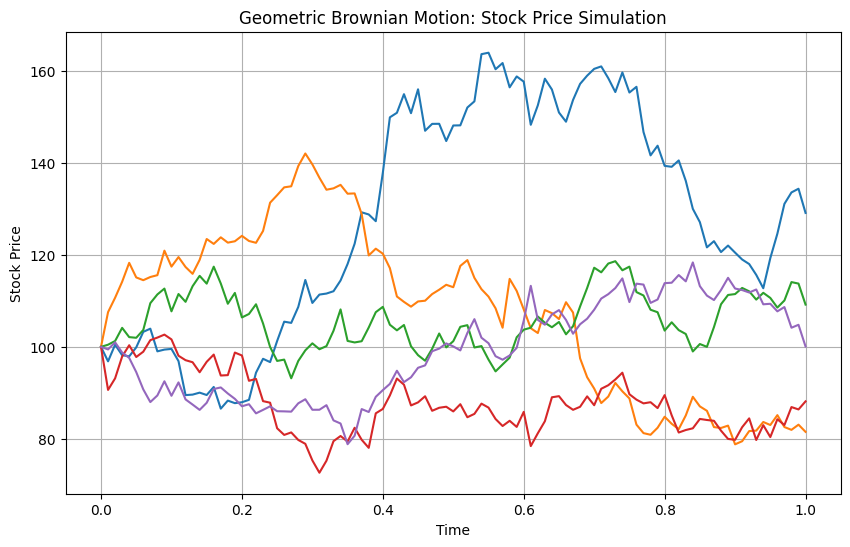

In [46]:
'''
comparing to the previous Geometric_Brownian_Motion,
the only differences are the epsilon term in the diffusion term and
np.sqrt(dt) instead of just dW
'''

def geometric_brownian_motion(S0, mu, sigma, T, dt, num_paths):
    num_steps = int(T / dt)
    time = np.linspace(0, T, num_steps+1)
    paths = np.zeros((num_paths, num_steps+1))
    paths[:, 0] = S0  # initial stock price (at t=0)

    for i in range(num_paths):
        for j in range(1, num_steps+1):
            epsilon = np.random.normal(0, 1)
            drift = mu * paths[i, j-1] * dt
            diffusion = sigma * paths[i, j-1] * epsilon  * np.sqrt(dt)
            paths[i, j] = paths[i, j-1] + drift + diffusion

    return time, paths

# initial conditions
S0 = 100  # initial stock price
mu = 0.15  # expected return
sigma = 0.30  # volatility
T = 1  # time horizon (1 yr)
dt = 0.01  # time interval
num_paths = 5  # number of simulations

# stocks simulation
time, paths = geometric_brownian_motion(S0, mu, sigma, T, dt, num_paths)

# plot of geometric process
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time, paths[i])

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Geometric Brownian Motion: Stock Price Simulation')
plt.grid(True)
plt.show()

### 4.3. Square Root Process

$$
    dS_t = \mu S_t dt + \sigma \sqrt{S_t} dW_t \qquad t \in [0, \infty)
$$

If the asset price volatility does not increase "too much" when $S_t$ increases, this model may be more appropriate.(if $S_t > 1$)

For approximation, we employ
$$
    dS_t = .15 S_t dt + .30 \sqrt{S_t} dW_t \qquad t \in [0, \infty)
$$


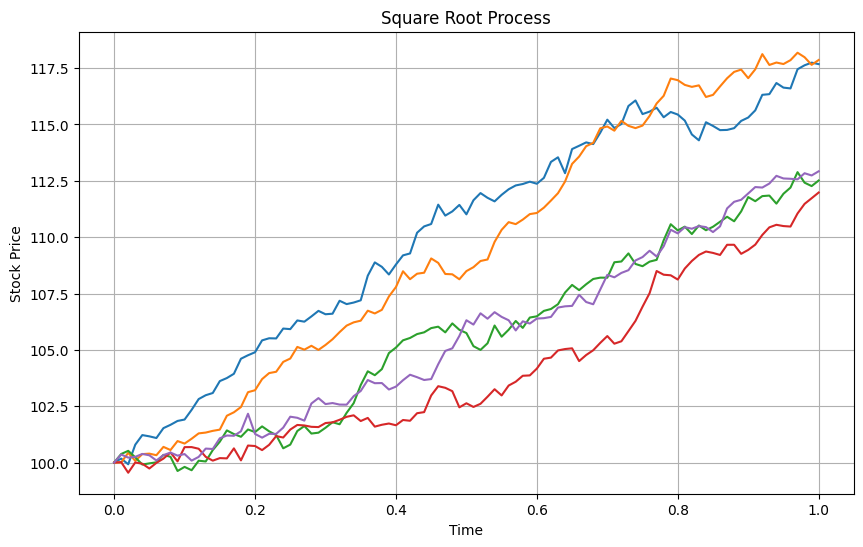

In [50]:
# only changed diffusion term here
def square_root_process(S0, mu, sigma, T, dt, num_paths):
    num_steps = int(T / dt)
    time = np.linspace(0, T, num_steps+1)
    paths = np.zeros((num_paths, num_steps+1 ))  # S(t)
    paths[:, 0] = S0  # initial stock price (at t=0)

    for i in range(num_paths):
        for j in range(1, num_steps+1):
            dW = np.random.normal(0, np.sqrt(dt))
            drift = mu * paths[i, j-1] * dt
            diffusion = sigma * np.sqrt(paths[i, j-1]) * dW
            paths[i, j] = paths[i, j-1] + drift + diffusion
    
    return time, paths

# initial conditions
S0 = 100.0  # initial stock price
mu = 0.15  # expected return
sigma = 0.30  # volatility
T = 1.0  # time horizon (1 year)
dt = 0.01  # time interval in discrete approximation
num_paths = 5  # number of simulations

# stocks simulation
time, paths = square_root_process(S0, mu, sigma, T, dt, num_paths)

# plot the geometric process
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time, paths[i])

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Square Root Process')
plt.grid(True)
plt.show()

### 4.3. Mean Reverting Process

$$
    dS_t = \lambda (\mu - S_t) dt + \sigma S_t dW_t
$$

$$
    dS_t = \lambda (\mu - S_t) dt + \sigma \sqrt{S_t} dW_t
$$

For discrete approximation, we implement the following SDE:
$$
    \Delta S_k = .5 (.05 - S_{k-1}).001 + .8 \Delta W_k, \qquad, k=1, 2, \ldots, 1000
$$

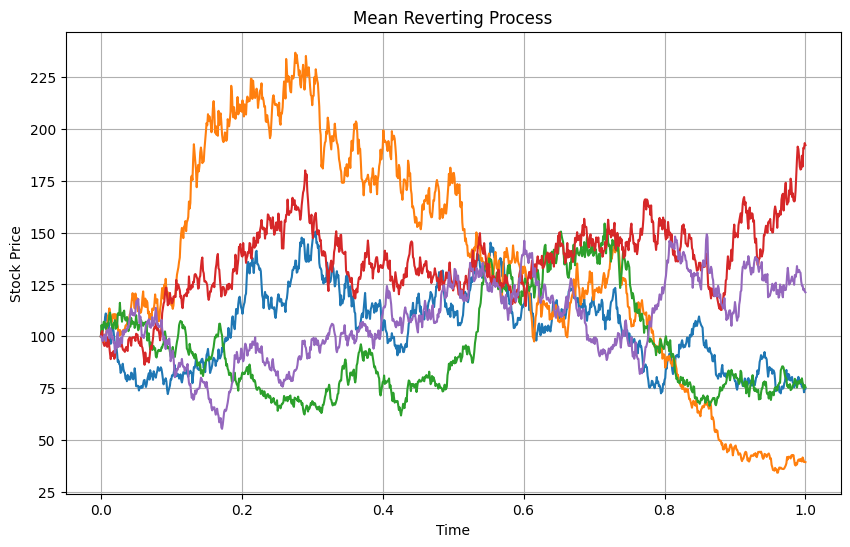

In [55]:
# only changed diffusion term here
def mean_reverting_process(S0, mu, sigma, T, dt, num_paths, lmbda):
    num_steps = int(T / dt)
    time = np.linspace(0, T, num_steps+1)
    paths = np.zeros((num_paths, num_steps+1 ))  # S(t)
    paths[:, 0] = S0  # initial stock price (at t=0)

    for i in range(num_paths):
        for j in range(1, num_steps+1):
            dW = np.random.normal(0, np.sqrt(dt))
            drift = lmbda *  (mu - paths[i, j-1]) * dt
            diffusion = sigma * paths[i, j-1] * dW
            paths[i, j] = paths[i, j-1] + drift + diffusbion
    
    return time, paths

# initial conditions - see p 270.
S0 = 100.0  # initial stock price
mu = 0.05  # expected return
sigma = 0.8  # volatility
T = 1.0  # time horizon (1 year)
dt = 0.001  # time interval in discrete approximation
num_paths = 5  # number of simulations
lmbda = 0.5

# stocks simulation
time, paths = mean_reverting_process(S0, mu, sigma, T, dt, num_paths, lmbda)

# plot the geometric process
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time, paths[i])

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Mean Reverting Process')
plt.grid(True)
plt.show()

$$
    dS_t = \lambda (\mu - S_t) dt + \sigma \sqrt{S_t} dW_t
$$

For discrete approximation, we implement the following SDE:
$$
    \Delta S_k = .5 (.05 - S_{k-1}).001 + .8 \Delta W_k, \qquad, k=1, 2, \ldots, 1000
$$

In [ ]:
def mean_reverting_process(S0, mu, sigma, T, dt, num_paths, lmbda):
    num_steps = int(T / dt)
    time = np.linspace(0, T, num_steps+1)
    paths = np.zeros((num_paths, num_steps+1 ))  # S(t)
    paths[:, 0] = S0  # initial stock price (at t=0)

    for i in range(num_paths):
        for j in range(1, num_steps+1):
            dW = np.random.normal(0, np.sqrt(dt))
            drift = lmbda *  (mu - paths[i, j-1]) * dt
            diffusion = sigma * paths[i, j-1] * dW
            paths[i, j] = paths[i, j-1] + drift + diffusion
    
    return time, paths

# initial conditions - see p 270.
S0 = 100.0  # initial stock price
mu = 0.05  # expected return
sigma = 0.8  # volatility
T = 1.0  # time horizon (1 year)
dt = 0.001  # time interval in discrete approximation
num_paths = 5  # number of simulations
lmbda = 0.5

# stocks simulation
time, paths = mean_reverting_process(S0, mu, sigma, T, dt, num_paths, lmbda)

# plot the geometric process
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time, paths[i])

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Mean Reverting Process')
plt.grid(True)
plt.show()

### 4.3. Ornstein-Uhlenbeck Process
$$
    dS_t = -\mu S_t dt + \sigma dW_t
$$
where $\mu > 0$